In [1]:
import pandas as pd
import numpy as np
import copy
import random
from __future__ import division
from __future__ import with_statement
import minimization as minz #My script in same folder for minimization routines
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
n_states = 8
n_signals = 0 #only without signal for now
n_rounds = 50
N = 40
n_parents = 20

experiment_clues = ['nosignal1','nosignal2','nosignal3','nosignal4','nosignal5', 'nosignal6']
file_types = {'epochs_av':'ep', 'epochs_jm':'epj', 'jm':'jms', 'summary':'summ'} #a shorter name for each type of data


#Path to Python outputs
python_folder = "/Users/luisalejandrolee/Dropbox/Thesis Phd/\
Coordination autos Chapter three/outputs_from_python/" #Python (minimization) outputs in this folder

#A dictionary with all the dataframes from the nosignalX treatments, for epochs, epochs_av, jms and summary.
shortns = minz.import_processed_runs(experiment_clues, file_types, python_folder,\
                                                   n_states , n_signals, n_rounds, N, n_parents)

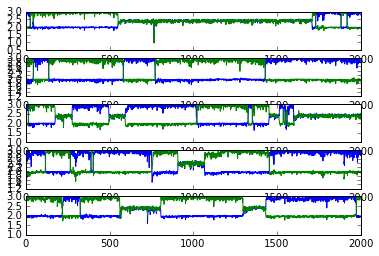

In [78]:
 def create_panels_figure(data, df, variables, rows, cols, i=0):
    fig, axes = plt.subplots(rows, cols, squeeze=False) #squeeze allows creation of 1 col or 1 row
    #i = 0 #keep track of the number of panels
    for row in xrange(rows):
        for col in xrange(cols):
            i+=1
            for v in variables:
                x = data[df+'%s'%i][v] #For example, df+'%s'%i = 'ep'+'2' = ep2, which is the name of dataframe
                axes[row][col].plot(x)
                
        

    plt.close()
    return fig





#variables = ['unvisited_measure']
#variables = ['coordination_A_perc', 'coordination_B_perc']
variables = ['av_score_row', 'av_score_col']
fig = create_panels_figure(shortns, 'summ', variables, rows=5, cols=1)
fig



In [2]:
variables1 = ['unvisited_measure', 'coordination_A_perc']
fig1 = create_panels_figure(shortns, 'summ', variables1, rows=1, cols=1)
fig1

NameError: name 'create_panels_figure' is not defined

In [82]:
shortns['summ1']

,generation,av_score_row,av_score_col,miscoordination_perc,coordination_B_perc,coordination_A_perc,row_heads_A,row_heads_B,row_tails_A,row_tails_B,...,ce,ce_individual,access_states,min_states,unused_states,unvisited_measure,behaviour_slack,construction_slack,regime_jm,regime_av
0,0,1.222138,1.148425,0.525887,0.273913,0.200200,0,0,0,0,...,0,0,6.4125,6.0750,0.0000,0.000000,0.759375,0.801562,not_threshold,Other
1,1,1.552088,1.237225,0.442138,0.436362,0.121500,0,0,0,0,...,0,0,6.5375,6.4500,0.0000,0.000000,0.806250,0.817187,not_threshold,Other
2,2,2.598225,1.773025,0.125750,0.849725,0.024525,0,0,0,0,...,0,0,6.8375,6.7375,0.0125,0.001563,0.842187,0.854688,not_threshold,Domination_BB
3,3,2.896300,1.940513,0.032637,0.961575,0.005788,0,0,0,0,...,0,0,7.2000,7.1250,0.3750,0.054688,0.890625,0.900000,not_threshold,Domination_BB
4,4,2.948900,1.972662,0.015688,0.980275,0.004038,0,0,0,0,...,0,0,6.3750,6.2375,1.0125,0.149926,0.779687,0.796875,"((('B', 'B'),), 0)",Domination_BB
5,5,2.989587,1.993162,0.003450,0.996487,0.000063,0,0,0,0,...,0,0,6.2500,6.1375,3.3750,0.449107,0.767188,0.781250,"((('B', 'B'),), 0)",Domination_BB
6,6,2.764675,1.890200,0.069025,0.902725,0.028250,0,0,0,0,...,0,0,6.0875,6.0375,2.2000,0.339390,0.754687,0.760938,"((('B', 'B'),), 0)",Domination_BB
7,7,2.899250,1.950312,0.030087,0.959425,0.010488,0,0,0,0,...,0,0,5.9375,5.9125,0.8750,0.121875,0.739062,0.742188,"((('B', 'B'),), 0)",Domination_BB
8,8,2.995913,1.997650,0.001288,0.998487,0.000225,0,0,0,0,...,0,0,6.7125,6.6500,1.4750,0.203199,0.831250,0.839063,"((('B', 'B'),), 0)",Domination_BB
9,9,2.993937,1.996125,0.001988,0.997912,0.000100,0,0,0,0,...,0,0,6.9000,6.8750,0.8500,0.117857,0.859375,0.862500,"((('B', 'B'),), 0)",Domination_BB


In [89]:
11%7

4